# IMPORT PACKAGES

In [1021]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1022]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# READ DATA

In [1023]:
#Importing dataset
Bike = pd.read_csv('day.csv')

# DATA UNDERSTANDING

In [1024]:
#Let's explore the top 5 rows
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1025]:
# Chcek the descriptive information
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1026]:
# Checking the shape of Bike df
Bike.shape

(730, 16)

In [1027]:
# Statisticqal summary of all numerical variable
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# DATA QUALITY CHECK

## Check for NULL/MISSING values

In [1028]:
#calculating the null values percentage of all attributes in dataset
round(100 * Bike.isnull().sum()/len(Bike),2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [1029]:
# row-wise null count percentage
round((Bike.isnull().sum(axis=1)/122)*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

## Duplicate Check

In [1030]:
# Create a dummy dataframe (copy of original bike df) for duplicate check
bike_dup = Bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [1031]:
bike_dup.shape

(730, 16)

## Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : Its only an index value
- dteday : This has the date, Since we already have seperate columns for 'year' & 'month' we could live without this column.
- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific categoy, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.
- We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [1032]:
Bike_new = Bike
print(Bike_new.shape)

(730, 16)


In [1033]:
print("old shape", Bike.shape)
print("new shape",Bike_new.shape)

old shape (730, 16)
new shape (730, 16)


In [1034]:
#Bike_new.drop(columns='instant',inplace=True)
Bike_new = Bike_new.drop(columns='instant')

In [1035]:
# Bike_new.drop(columns='dteday',inplace=True)
Bike_new = Bike_new.drop(columns='dteday')

In [1036]:
print("old shape", Bike.shape)
print("new shape",Bike_new.shape)

old shape (730, 16)
new shape (730, 14)


In [1037]:
Bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1038]:
#check for datatypes
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 85.5 KB


#### Treating Season Feature

In [1039]:
Bike_new.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [1040]:
# Function to assign Season variable
def assignSeason(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [1041]:
Bike_new[['season']] = Bike_new[['season']].apply(assignSeason)

In [1042]:
Bike_new['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [1043]:
Bike_new.dtypes

season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Treating Month Feature

In [1044]:
Bike_new.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [1045]:
#Function to assign month
def assignMonth(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [1046]:
Bike_new[['mnth']] = Bike_new[['mnth']].apply(assignMonth)

In [1047]:
Bike_new['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [1048]:
Bike_new.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Treating weathersit Feature

In [1049]:
Bike_new.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [1050]:
#Function to assign weatherside
def assign_Weathersit(x):
    return x.map({1:'Clear_Few_Clouds',2:'Mist_Cloudy',3:'Light_Snow'})

In [1051]:
Bike_new[['weathersit']] = Bike_new[['weathersit']].apply(assign_Weathersit)

In [1052]:
Bike_new.weathersit.value_counts()

Clear_Few_Clouds    463
Mist_Cloudy         246
Light_Snow           21
Name: weathersit, dtype: int64

In [1053]:
Bike_new.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday         int64
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Treating weekday Feature

In [1054]:
Bike_new.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [1055]:
#Function to assign day
def assing_day(x):
    return x.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thrusday',
                 5:'Friday',6:'Saturday'})

In [1056]:
Bike_new[['weekday']] = Bike_new[['weekday']].apply(assing_day)

In [1057]:
Bike_new.weekday.value_counts()

Tuesday      105
Monday       105
Sunday       104
Wednesday    104
Thrusday     104
Saturday     104
Friday       104
Name: weekday, dtype: int64

In [1058]:
Bike_new.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Data Visualization - EXPLORATORY DATA ANALYSIS

## Assigning Corrct Data Types

In [1059]:
Bike_new.yr = Bike_new.yr.astype('object')
Bike_new.holiday = Bike_new.holiday.astype('object')
Bike_new.workingday = Bike_new.workingday.astype('object')

In [1060]:
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 85.5+ KB


In [1061]:
Bike_new.describe().columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

## Visualising Numeric Variables

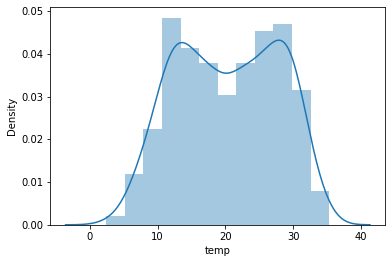

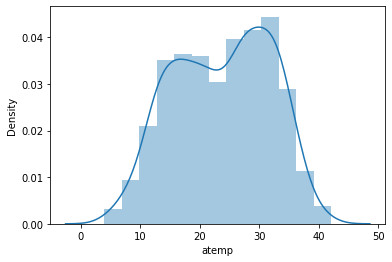

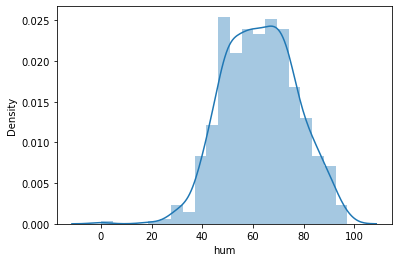

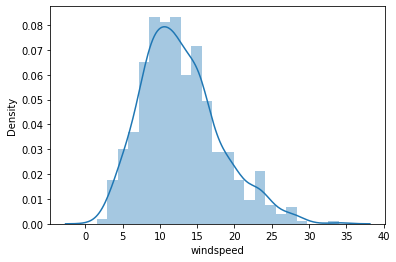

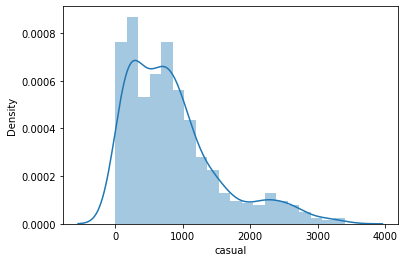

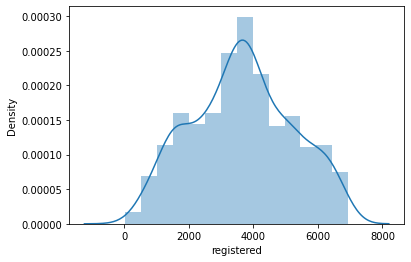

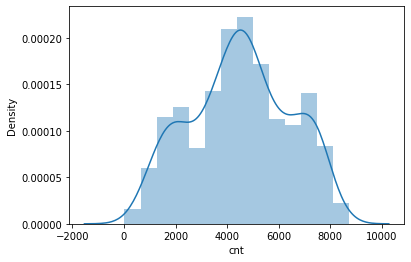

In [1062]:
x = list(Bike_new.describe().columns)
for i in x:
    sns.distplot(Bike_new[i])
    plt.show()

Analysis Based On Above Distplot - INSIGHTS
- Temp: Most of the people prefer to rent the bike when temp is in between 15 to 30 degree celsius
- atemp: Most of the people prefer to rent the bike when they feel the temp is in between 15 to 35 degree celsius
- Humidity : When humidity is aroung 50 to 65, Renting bike percantage is increasing.
- Windspeed : As the windspeed is increasing people stop renting bike. It is also clear from the distplot that this data is slightly left skewed

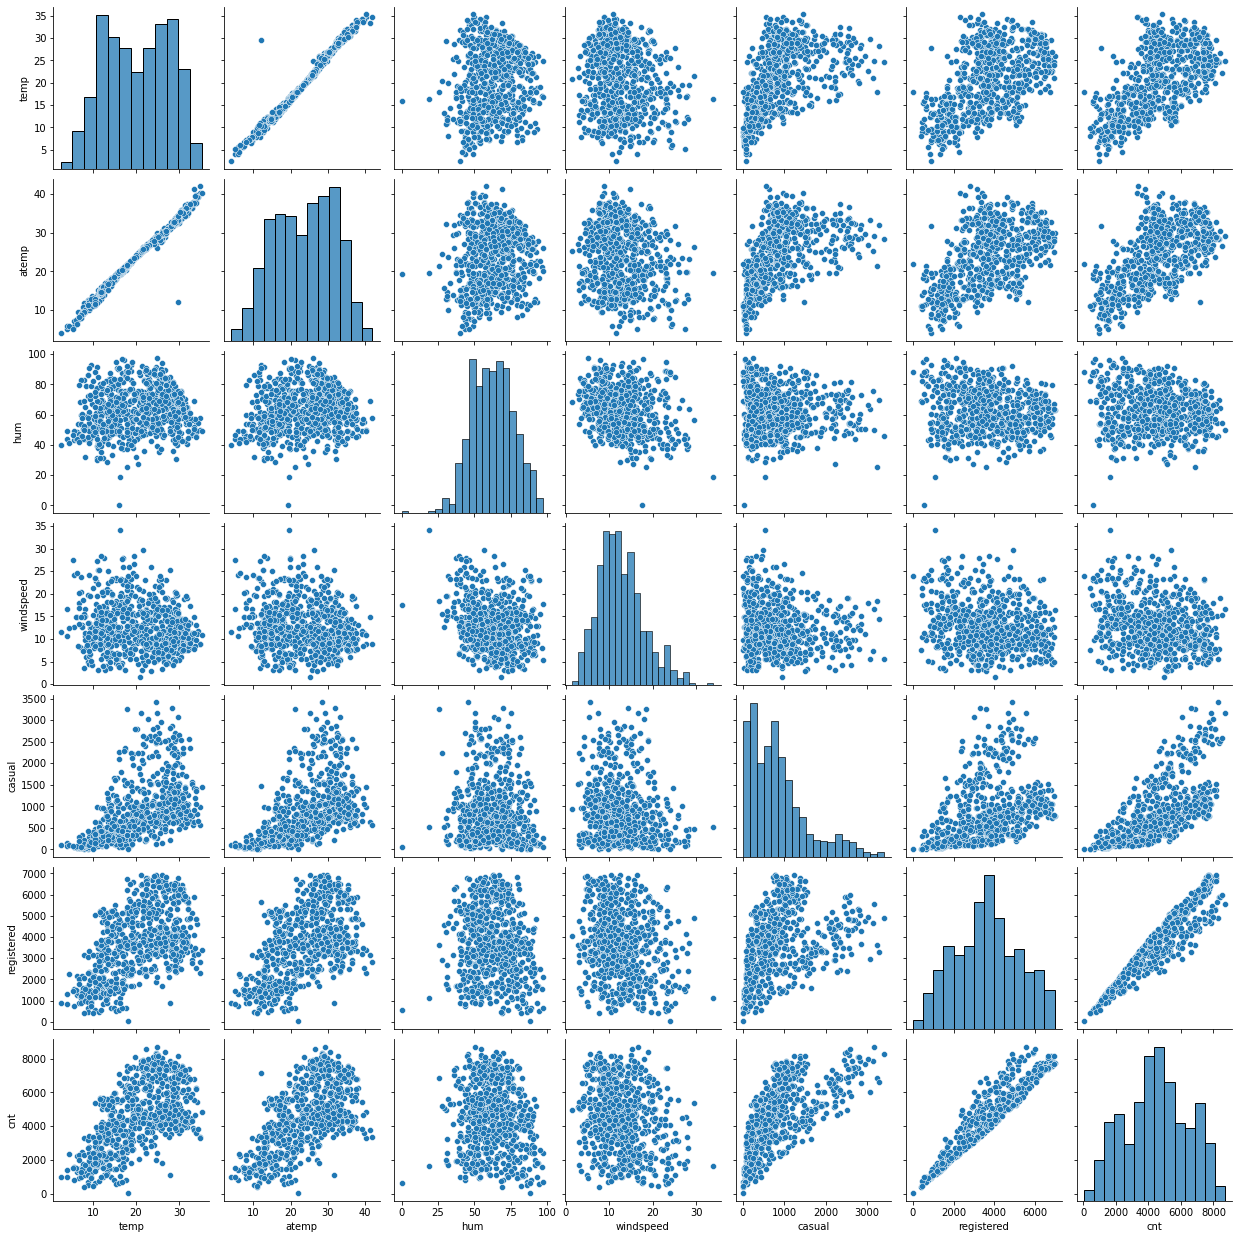

In [1063]:
# 1)PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES
sns.pairplot(Bike_new, vars=x)
plt.show()

INSIGHT: 
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

## Visualising Catagorical Variables

In [1064]:
# Categorical variables
Bike_new_categorical = Bike_new.select_dtypes(exclude=['float64','int64','datetime64'])
Bike_new_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [1065]:
len(Bike_new_categorical.columns)

7

In [1066]:
list(Bike_new_categorical.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

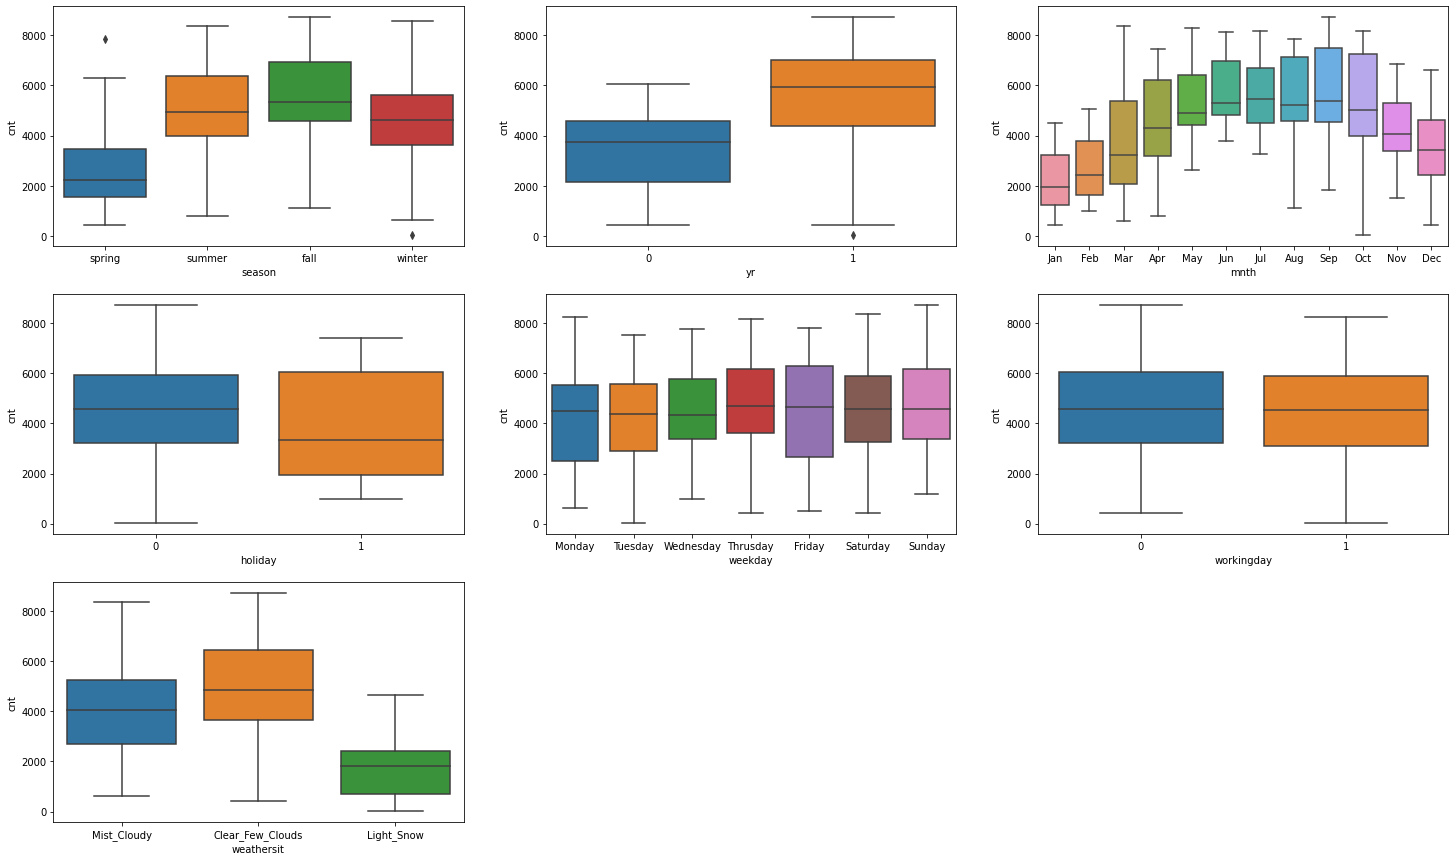

In [1067]:
# Visualizing Categorical data
plt.figure(figsize=[25,15])
counter = 1
for i in list(Bike_new_categorical.columns):
    plt.subplot(3,3,counter)
    sns.boxplot(x=i, y='cnt', data=Bike_new)
    counter +=1

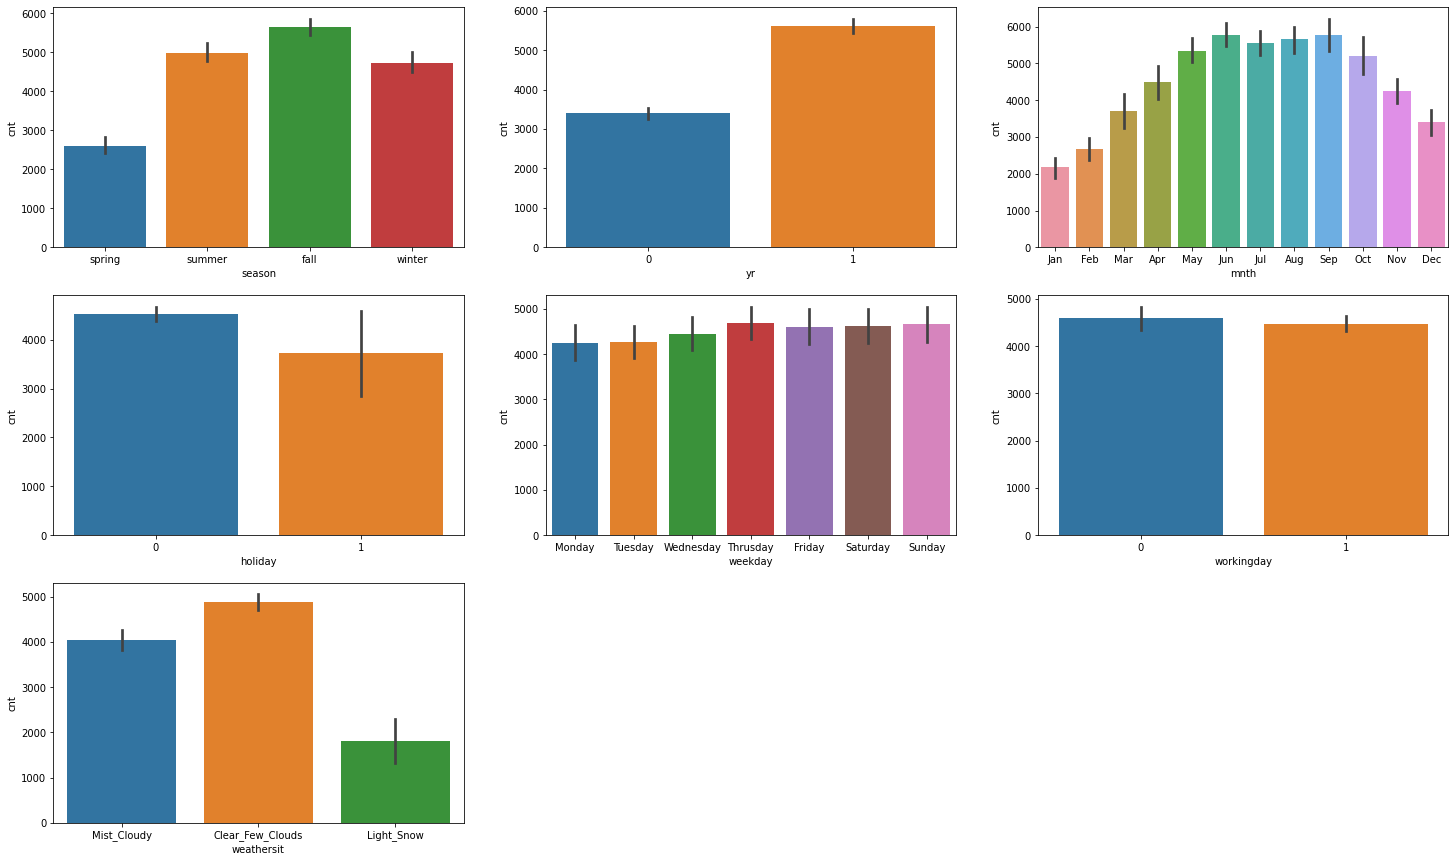

In [1068]:
# Visualizing Categorical data Bar Plot
plt.figure(figsize=[25,15])
counter = 1
for i in list(Bike_new_categorical.columns):
    plt.subplot(3,3,counter)
    sns.barplot(x=i, y='cnt', data=Bike_new)
    counter +=1

INSIGHT:
- I used Box plot and barplot to study their effect on the dependent variable (‘cnt’) .The inference that I could derive were: 
- season: Almost 32% of the bike booking were happening in fall with a median of over 5000 booking (for the period of 2 years). This was followed by Summer & Winter with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable. 
- mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. 
- weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable. 
- holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. 
- weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not. 
- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable.


## Correlation Matrix

In [1069]:
# Now let check the correlation
corr = Bike_new.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


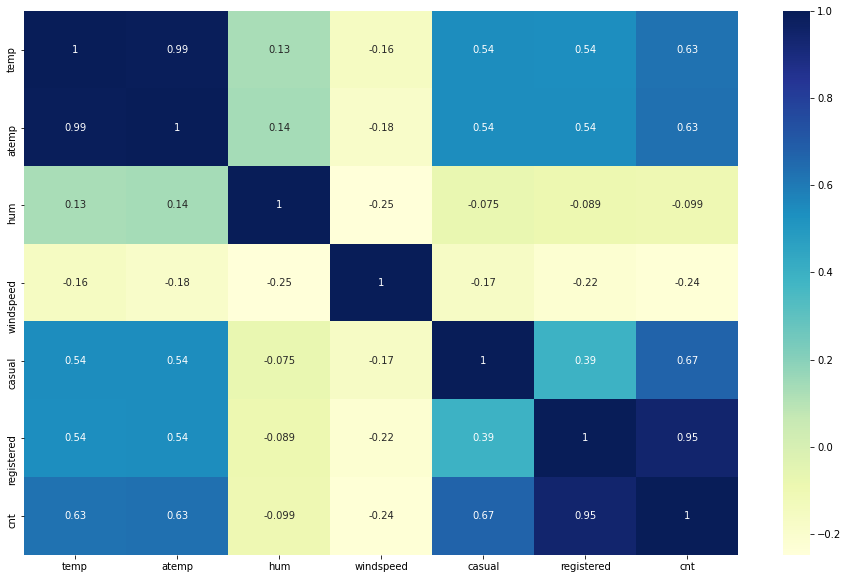

In [1070]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here im considering only those variables (dataframe: bike_new) that were chosen for analysis
plt.figure(figsize = (16, 10))
sns.heatmap(corr, annot=True,cmap="YlGnBu")
plt.show()

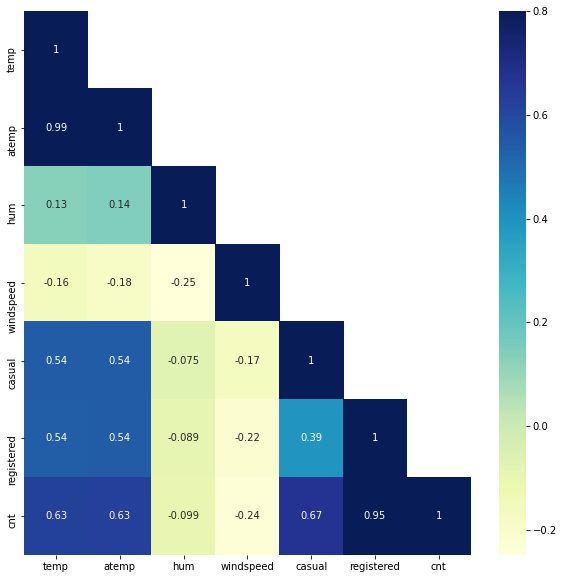

In [1071]:
# Heatmap

mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,annot=True, mask=mask, vmax=0.8, square=False,cmap='YlGnBu');

INSIGHT: 
- from above graphs and corr matrix we can say that temp and atemp have a strong relationship means it will create multicollinearity issue
- cnt and registered is also strongly correlated
- windspeed and cnt are negatively related which means during windspeed people don't prefer to rent a bike
- cnt and casual are also strongly related
- cnt and registered are also strongly related

#### Droping the columns atemp,casual,registered as they are highly correalated and may leads to multicollinerity

In [1072]:
# dropping atemp as it is highly correlated with temp
Bike_new.drop(['atemp'],axis= 1, inplace=True)
#Dropping casual and registered as both are the cnt of rented bike and here our target variable is cnt 
Bike_new.drop(['casual'],axis= 1, inplace=True)
Bike_new.drop(['registered'],axis= 1, inplace=True)

In [1073]:
Bike_new.shape

(730, 11)

In [1074]:
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 88.4+ KB


# Data Preparation
## Creating Dummy Variables

In [1075]:
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 88.4+ KB


In [1076]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 
#Season
season_Cond = pd.get_dummies(Bike_new['season'],drop_first=True)
season_Cond.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1077]:
mnth_cond = pd.get_dummies(Bike_new['mnth'],drop_first=True)
mnth_cond.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [1078]:
weekday_cond = pd.get_dummies(Bike_new['weekday'],drop_first=True)
weekday_cond.head()

,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [1079]:
weathersit_cond = pd.get_dummies(Bike_new['weathersit'],drop_first=True)
weathersit_cond.head()

,Light_Snow,Mist_Cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1080]:
# Adding Season Dummy Variables to Bike_new dataframe
Bike_new = pd.concat([Bike_new,season_Cond], axis=1)
Bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Monday,1,Mist_Cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tuesday,1,Mist_Cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wednesday,1,Clear_Few_Clouds,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thrusday,1,Clear_Few_Clouds,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Friday,1,Clear_Few_Clouds,9.305237,43.6957,12.522300,1600,1,0,0


In [1081]:
Bike_new.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
spring          uint8
summer          uint8
winter          uint8
dtype: object

In [1082]:
# Adding Season Dummy Variables to Bike_new dataframe
Bike_new = pd.concat([Bike_new,mnth_cond], axis=1)
Bike_new = pd.concat([Bike_new,weekday_cond], axis=1)
Bike_new = pd.concat([Bike_new,weathersit_cond], axis=1)
Bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
0,spring,0,Jan,0,Monday,1,Mist_Cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,Mist_Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,Clear_Few_Clouds,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thrusday,1,Clear_Few_Clouds,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear_Few_Clouds,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [1083]:
Bike_new.dtypes

season          object
yr              object
mnth            object
holiday         object
weekday         object
workingday      object
weathersit      object
temp           float64
hum            float64
windspeed      float64
cnt              int64
spring           uint8
summer           uint8
winter           uint8
Aug              uint8
Dec              uint8
Feb              uint8
Jan              uint8
Jul              uint8
Jun              uint8
Mar              uint8
May              uint8
Nov              uint8
Oct              uint8
Sep              uint8
Monday           uint8
Saturday         uint8
Sunday           uint8
Thrusday         uint8
Tuesday          uint8
Wednesday        uint8
Light_Snow       uint8
Mist_Cloudy      uint8
dtype: object

In [1084]:
Bike_new.shape

(730, 33)

### Deleting the orginal columns season.weathersit,weekday,mnth

In [1085]:
Bike_new.drop(['season','weathersit','weekday','mnth'],axis=1,inplace=True)

In [1086]:
Bike_new.shape

(730, 29)

In [1087]:
Bike_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1088]:
Bike_new.dtypes

yr              object
holiday         object
workingday      object
temp           float64
hum            float64
windspeed      float64
cnt              int64
spring           uint8
summer           uint8
winter           uint8
Aug              uint8
Dec              uint8
Feb              uint8
Jan              uint8
Jul              uint8
Jun              uint8
Mar              uint8
May              uint8
Nov              uint8
Oct              uint8
Sep              uint8
Monday           uint8
Saturday         uint8
Sunday           uint8
Thrusday         uint8
Tuesday          uint8
Wednesday        uint8
Light_Snow       uint8
Mist_Cloudy      uint8
dtype: object

In [1089]:
Bike_new['yr'] = Bike_new['yr'].astype('int64')
Bike_new['holiday'] = Bike_new['holiday'].astype('int64')
Bike_new['workingday'] = Bike_new['workingday'].astype('int64')

In [1090]:
Bike_new.dtypes

yr               int64
holiday          int64
workingday       int64
temp           float64
hum            float64
windspeed      float64
cnt              int64
spring           uint8
summer           uint8
winter           uint8
Aug              uint8
Dec              uint8
Feb              uint8
Jan              uint8
Jul              uint8
Jun              uint8
Mar              uint8
May              uint8
Nov              uint8
Oct              uint8
Sep              uint8
Monday           uint8
Saturday         uint8
Sunday           uint8
Thrusday         uint8
Tuesday          uint8
Wednesday        uint8
Light_Snow       uint8
Mist_Cloudy      uint8
dtype: object

# SPLITTING THE DATA¶

Splitting the data to Train and Test: 
- We will now split the data into TRAIN and TEST (70:30 ratio) 
- We will use train_test_split method from sklearn package for this

In [1091]:
np.random.seed(0)
Bike_New_train,Bike_New_test = train_test_split(Bike_new, train_size=0.7, random_state=100)
print(Bike_New_train.shape)
print(Bike_New_test.shape)

(510, 29)
(220, 29)


In [1092]:
Bike_New_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           510 non-null    int64  
 1   holiday      510 non-null    int64  
 2   workingday   510 non-null    int64  
 3   temp         510 non-null    float64
 4   hum          510 non-null    float64
 5   windspeed    510 non-null    float64
 6   cnt          510 non-null    int64  
 7   spring       510 non-null    uint8  
 8   summer       510 non-null    uint8  
 9   winter       510 non-null    uint8  
 10  Aug          510 non-null    uint8  
 11  Dec          510 non-null    uint8  
 12  Feb          510 non-null    uint8  
 13  Jan          510 non-null    uint8  
 14  Jul          510 non-null    uint8  
 15  Jun          510 non-null    uint8  
 16  Mar          510 non-null    uint8  
 17  May          510 non-null    uint8  
 18  Nov          510 non-null    uint8  
 19  Oct   

In [1093]:
Bike_New_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           220 non-null    int64  
 1   holiday      220 non-null    int64  
 2   workingday   220 non-null    int64  
 3   temp         220 non-null    float64
 4   hum          220 non-null    float64
 5   windspeed    220 non-null    float64
 6   cnt          220 non-null    int64  
 7   spring       220 non-null    uint8  
 8   summer       220 non-null    uint8  
 9   winter       220 non-null    uint8  
 10  Aug          220 non-null    uint8  
 11  Dec          220 non-null    uint8  
 12  Feb          220 non-null    uint8  
 13  Jan          220 non-null    uint8  
 14  Jul          220 non-null    uint8  
 15  Jun          220 non-null    uint8  
 16  Mar          220 non-null    uint8  
 17  May          220 non-null    uint8  
 18  Nov          220 non-null    uint8  
 19  Oct   

# RESCALING THE FEATURES

In [1094]:
num_vars=['temp', 'hum', 'windspeed','cnt']
# 1. Instantiate the object
scalar = MinMaxScaler()
# 2. Fit on data
Bike_New_train[num_vars] = scalar.fit_transform(Bike_New_train[num_vars])

Bike_New_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [1095]:
Bike_New_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1096]:
# transform the data on test data set
Bike_New_test[num_vars] = scalar.transform(Bike_New_test[num_vars])

In [1097]:
Bike_New_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [1098]:
Bike_New_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL

## Training the model

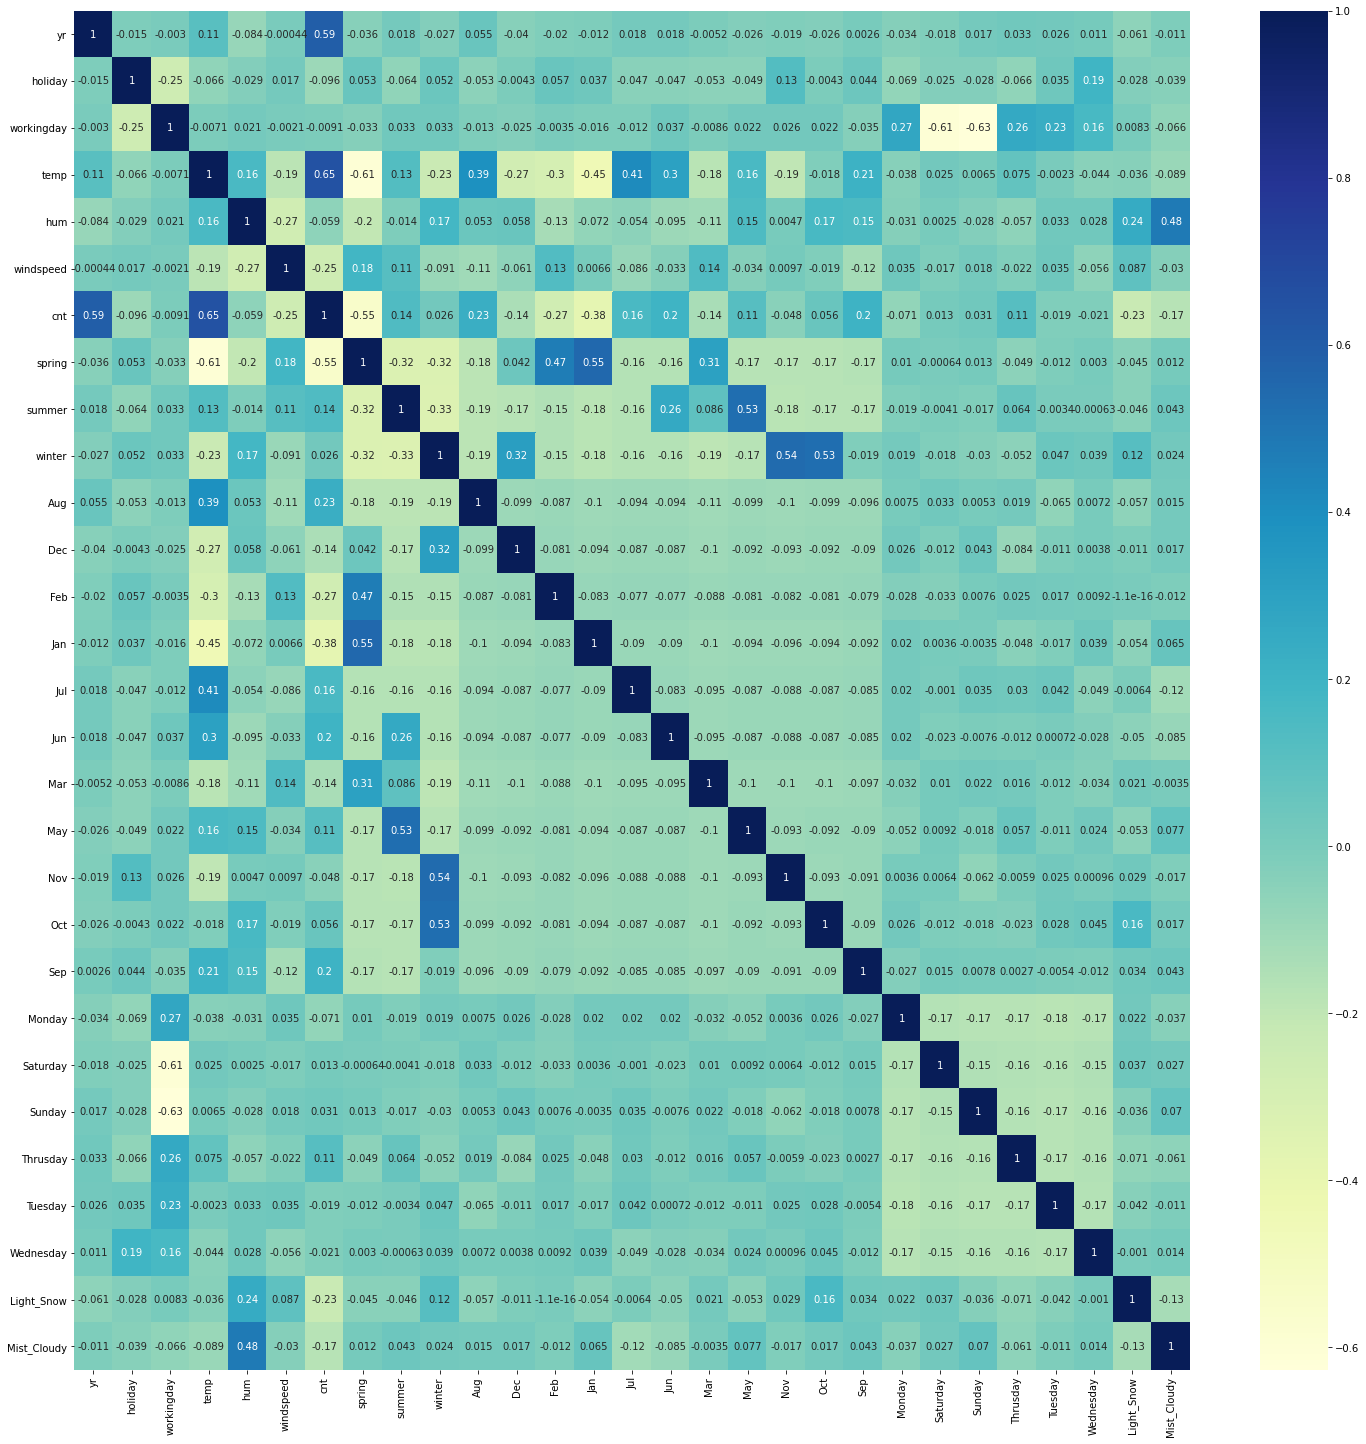

In [1099]:
# heat map 
plt.figure(figsize=(25,25))
sns.heatmap(Bike_New_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

INSIGHTS:
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. 
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model. -

In [1100]:
#X_train, y_train
Y_train = Bike_New_train.pop('cnt')
X_train = Bike_New_train

In [1101]:
Y_train.shape

(510,)

In [1102]:
X_train.shape

(510, 28)

In [1103]:
Y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [1104]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


## Method 1 : Building a Linear Model

In [1105]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [1106]:
# Coefficient of all varaibles
print(len(lm.coef_))
lm.coef_

28


array([ 0.23113454, -0.13475388, -0.06004869,  0.44051172, -0.15735461,
       -0.18248588, -0.04038561,  0.04644297,  0.11262053,  0.02730744,
       -0.04438711, -0.03742192, -0.06420883, -0.02850373,  0.00839253,
        0.00079984,  0.02473206, -0.03955335,  0.00563407,  0.09082283,
       -0.0246206 , -0.05571884, -0.04945969,  0.00422678, -0.02607218,
       -0.01022525, -0.24994689, -0.0578478 ])

In [1107]:
coeff_df = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
yr,0.231135
holiday,-0.134754
workingday,-0.060049
temp,0.440512
hum,-0.157355
windspeed,-0.182486
spring,-0.040386
summer,0.046443
winter,0.112621
Aug,0.027307


In [1108]:
# Intercept Point 
lm.intercept_

0.3911631042886942

In [1109]:
#X_test, y_test
Y_test = Bike_New_test.pop('cnt')
X_test = Bike_New_test

In [1110]:
print(X_test.shape)
print(Y_test.shape)

(220, 28)
(220,)


In [1111]:
# Making  predictions
y_pred = lm.predict(X_test)

In [1112]:
df = pd.DataFrame({
    'Actual':Y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
184,0.692706,0.407435
535,0.712034,0.894308
299,0.303382,0.428573
221,0.547400,0.616042
152,0.569029,0.602759
...,...,...
702,0.757478,0.678290
127,0.495973,0.518652
640,0.868615,0.817109
72,0.232858,0.309655


In [1113]:
# Evaluating the Algorithm
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(Y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(Y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error:  0.06708846570923567
Mean Squared Error:  0.008180933522507424
Root Mean Squared Error:  0.09044851310280022


In [1114]:
# Train Data Set R Squared value and Adjusted R Squared value
yhat = lm.predict(X_train)
SS_Residual = sum((Y_train-yhat)**2)
SS_Total = sum((Y_train-np.mean(Y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8501892982674751 0.8414685089774321


In [1115]:
# Test Data Set R Squared value and Adjusted R Squared value
yhat = lm.predict(X_test)
SS_Residual = sum((Y_test-yhat)**2)
SS_Total = sum((Y_test-np.mean(Y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8289018760341198 0.8038194285417395


###  So here r2 square on test set is similar to train set , so we can say that our model is learned correctly using first method

## Method 2 : Model Building using RFE

In [1116]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1117]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, 15) 

# running RFE
rfe = rfe.fit(X_train, Y_train)


In [1118]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 7),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thrusday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 10),
 ('Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1)]

In [1119]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_Snow',
       'Mist_Cloudy'],
      dtype='object')

In [1120]:
print(len(list(col)))
X_train[col].head()

15


,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Light_Snow,Mist_Cloudy
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [1121]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thrusday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [1122]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using 'STATS MODEL'

## Model_REF - 1

In [1123]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train_rfe)
# Create first model
lr = sm.OLS(Y_train, X_train_sm)
# fit
lm1 = lr.fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.15e-189
Time:                        14:08:18   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3197      0.036      8.859      

## Now after seeing the summary, following insights are observed
- After seeing the summary we find that p value (significance) for all the features is less than 5 % which is statstically significant
- Here R-squared value is 84.8% whereas in previous model it was 82% so this model is better than previous one
- Here Adj. R-squared: is also 84.2 % whereas in previous model it was 80%

In [1124]:

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [1125]:
checkVIF(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Mist_Cloudy,2.32
0,yr,2.09
11,Nov,1.85
9,Jan,1.75


## Model_REF - 2

In [1126]:
#COLUMN hum  HAS A VERY HIGH VIF value SO WE DROP IT 
# X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [1127]:
# Add a constant to get an intercept
X_train_rfe2 = sm.add_constant(X_train_rfe)
# Create first model
lm2 = sm.OLS(Y_train, X_train_rfe2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.75e-186
Time:                        14:08:18   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2450      0.032      7.618      

In [1128]:
checkVIF(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
10,Nov,1.81
8,Jan,1.66
9,Jul,1.59
13,Mist_Cloudy,1.57


## Model_REF - 3

In [1129]:
#COLUMN Nov  HAS A VERY HIGH p value SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [1130]:
# Add a constant to get an intercept
X_train_rfe3 = sm.add_constant(X_train_rfe)
# Create first model
lm3 = sm.OLS(Y_train, X_train_rfe3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.74e-186
Time:                        14:08:18   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2283      0.031      7.310      

In [1131]:
checkVIF(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
8,Jan,1.65
9,Jul,1.59
12,Mist_Cloudy,1.57
10,Sep,1.34


## Model_REF - 4

In [1132]:
#COLUMN Dec  HAS A VERY HIGH p value SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['Dec'],axis=1)

In [1133]:
# Add a constant to get an intercept
X_train_rfe4 = sm.add_constant(X_train_rfe)
# Create first model
lm4 = sm.OLS(Y_train, X_train_rfe4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          8.14e-187
Time:                        14:08:18   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2154      0.030      7.088      

In [1134]:
checkVIF(X_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
7,Jan,1.61
8,Jul,1.59
11,Mist_Cloudy,1.56
9,Sep,1.34


## Model_REF - 5

In [1135]:
#COLUMN Jan  HAS A VERY HIGH p value SO WE DROP IT 
# X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)
X_train_rfe=X_train_rfe.drop(['Jan'],axis=1)


In [1136]:
# Add a constant to get an intercept
X_train_rfe5 = sm.add_constant(X_train_rfe)
# Create first model
lm5 = sm.OLS(Y_train, X_train_rfe5).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          5.06e-187
Time:                        14:08:18   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1994      0.030      6.746      

In [1137]:
checkVIF(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,Jul,1.58
10,Mist_Cloudy,1.55
8,Sep,1.34
9,Light_Snow,1.08


## Model_REF - 6

In [1138]:
#COLUMN Jul  HAS A VERY HIGH p value SO WE DROP IT 
# X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)
X_train_rfe=X_train_rfe.drop(['Jul'],axis=1)

In [1139]:
# Add a constant to get an intercept
X_train_rfe6 = sm.add_constant(X_train_rfe)
# Create first model
lm6 = sm.OLS(Y_train, X_train_rfe6).fit()

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.47e-186
Time:                        14:08:18   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1909      0.030      6.447      

In [1140]:
checkVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Mist_Cloudy,1.55
7,Sep,1.23
8,Light_Snow,1.08
1,holiday,1.04


## Model_REF - 7

In [1141]:
#COLUMN spring HAS A VERY HIGH P Value SO WE DROP IT 
# X_train_rfe=X_train_rfe.drop(['hum'],axis=1)spring
X_train_rfe=X_train_rfe.drop(['spring'],axis=1)

In [1142]:
# Add a constant to get an intercept
X_train_rfe7 = sm.add_constant(X_train_rfe)
# Create first model
lm7 = sm.OLS(Y_train, X_train_rfe7).fit()

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.83e-186
Time:                        14:08:18   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1259      0.017      7.508      

In [1143]:
checkVIF(X_train_rfe)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,summer,1.57
8,Mist_Cloudy,1.48
5,winter,1.37
6,Sep,1.20
7,Light_Snow,1.08
1,holiday,1.04


INSIGHT: 
- This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. 
- For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number). 

## We have considered all columns and checked.Now we stop the model building and check on which model can we choose Model_REF - 7


# Final Model Interpretation

### Hypothesis Testing:
Hypothesis testing states that:

- 𝐻0:𝐵1=𝐵2=...=𝐵𝑛=0 
- 𝐻1:  at least one  𝐵𝑖!=0 

lm7 model coefficient values

- const: 0.1259
- yr: 0.2329
- holiday: -0.0987
- temp: 0.5480
- windspeed: -0.1532
- Summer: 0.0881
- Winter: 0.1293
- Sep: 0.1012
- Light_Snow: -0.2829
- Misty_Cloud: -0.0784


INSIGHT: 
  - From the lm7 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS


### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 271.9
- Prob (F-statistic): 2.83e-186

#### The F-Statistics value of 271 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best fitted surface based on model lm7:
cnt=0.1259+(yr×0.2329)-(holiday×0.0987)+(temp×0.5480)−(windspeed×0.1532)+(Summer×0.0881)+(Winter×0.1293)+(Sep×0.1012)−(Light_Snow×0.074807)−(Misty_Cloud×0.0784)

### Interpretation of Coefficients:

- temp: A coefficient value of ‘0.5480’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5480 units.

- Light_Snow: A coefficient value of ‘-0.2829’ indicated that, w.r.t Misty_Cloud, a unit increase in Light_Snow variable, decreases the bike hire numbers by 0.2829 units.

- yr: A coefficient value of ‘0.2329’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2329 units.

- Summer: A coefficient value of ‘0.0881’ indicated that w.r.t Winter, a unit increase in Summer variable increases the bike hire numbers by 0.0881 units.

- windspeed: A coefficient value of ‘-0.1532’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1532 units.

- Winter: A coefficient value of ‘0.1293’ indicated that w.r.t Summer, a unit increase in Winter variable Increases the bike hire numbers by 0.1293 units.

- Sep: A coefficient value of ‘0.1012’ , a unit increase in Sep variable increases the bike hire numbers by 0.1012 units.

- holiday: A coefficient value of ‘-0.0987’ , a unit increase in holiday variable decrease the bike hire numbers by 0.0987 units.

- Misty_Cloud: A coefficient value of ‘-0.0784’ indicated that, w.r.t Light_Snow, a unit increase in Misty_Cloud variable, decreases the bike hire numbers by 0.074807 units.

- const: The Constant value of ‘0.1259’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.1259 units.


# VALIDATE ASSUMPTIONS

## Residual Analysis

In [1144]:
#Predict values
y_train_cnt = lm7.predict(X_train_rfe7)

In [1145]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1146]:
#CALCULATING RESIDUALS
res=Y_train - y_train_cnt

Text(0.5, 0, 'Errors')

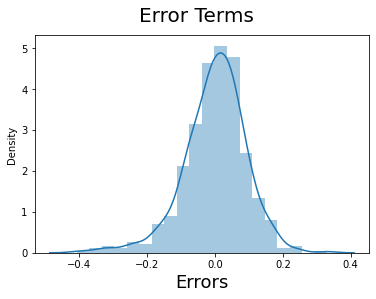

In [1147]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18) 

INSIGHT: 
- From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

In [1148]:
#Checking columns
X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter',
       'Sep', 'Light_Snow', 'Mist_Cloudy'],
      dtype='object')

In [1149]:
print(X_train_rfe7.shape)
print(res.shape)

(510, 10)
(510,)


## Prediction and Evaluation of the Test Set

In [1150]:
Bike_New_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1151]:
Bike_New_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Monday,Saturday,Sunday,Thrusday,Tuesday,Wednesday,Light_Snow,Mist_Cloudy
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1152]:
print(X_test.shape)
print(Y_test.shape)

(220, 28)
(220,)


In [1153]:
X_train_rfe7.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter',
       'Sep', 'Light_Snow', 'Mist_Cloudy'],
      dtype='object')

In [1154]:
X_train_new=X_train_rfe7.drop(['const'], axis=1)

In [1155]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter', 'Sep',
       'Light_Snow', 'Mist_Cloudy'],
      dtype='object')

In [1156]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1157]:
X_test_new.head()

,const,yr,holiday,temp,windspeed,summer,winter,Sep,Light_Snow,Mist_Cloudy
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [1158]:
#Making predictions on the chosen model
y_pred = lm7.predict(X_test_new)

Text(0, 0.5, 'y_pred')

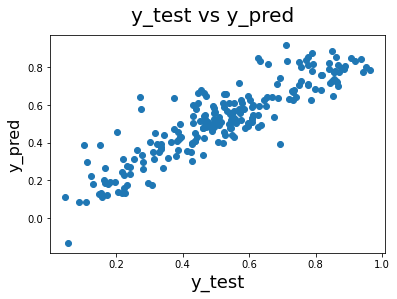

In [1159]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(Y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)  
# Plot heading 
plt.xlabel('y_test', fontsize=18)          
# X-label
plt.ylabel('y_pred', fontsize=16) 

### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

# R^2 Value for TEST

In [1160]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1161]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(Y_test, y_pred))

0.09919821639088697

In [1162]:
#Calculate the r square for test
r_squared = r2_score(Y_test, y_pred)
r_squared

0.7941977535477243

# Adjusted R^2 Value for TEST

In [1163]:

# We already have the value of R^2 (calculated in above step)
r2=0.7941977535477243

# Get the shape of X_test
X_test_new.shape

(220, 10)

In [1164]:
# n is number of rows in X

n = X_test_new.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7843507561098164

In [1165]:
X_t=X_train_new.iloc[:,0].values

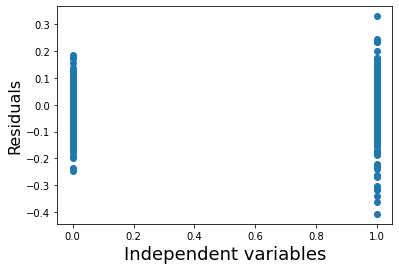

In [1166]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20) 
plt.xlabel('Independent variables', fontsize=18)                     
plt.ylabel('Residuals', fontsize=16)  
plt.show()

In [1167]:
print(X_train_rfe7.columns)
print(lm7.summary())

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'summer', 'winter',
       'Sep', 'Light_Snow', 'Mist_Cloudy'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.83e-186
Time:                        14:08:19   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025   

In [1168]:
checkVIF(X_train_rfe)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,summer,1.57
8,Mist_Cloudy,1.48
5,winter,1.37
6,Sep,1.20
7,Light_Snow,1.08
1,holiday,1.04


# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- Temperature (temp) - A coefficient value of ‘0.5480’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5480 units. 

- Light_Snow - A coefficient value of ‘-0.2829’ indicated that, w.r.t Mist_Cloudy, a unit increase in Light_Snow variable decreases the bike hire numbers by 0.2829 units. 

- Year (yr) - A coefficient value of ‘0.2329’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2329 units. 

     SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM BOOKING.
     
- The next best features that can also be considered are - 

- winter: - A coefficient value of ‘0.1293’ indicated that w.r.t Summer, a unit increase in Winter variable increases the bike hire numbers by 0.1293 units. 

- windspeed: - A coefficient value of ‘-0.1532’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1532 units.

### NOTE: 
- The details of Light_Snow & Mist_Cloudy 

- Mist_Cloudy: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

- Light Snow: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


In [1169]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [1170]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


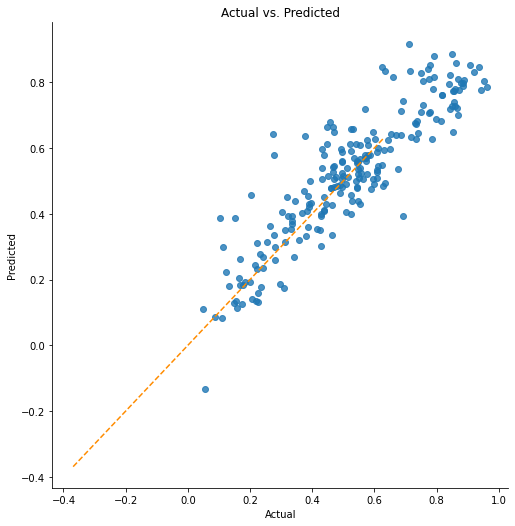

In [1171]:
linear_assumption(lm7, X_test_new, Y_test)

In [1172]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [1173]:
autocorrelation_assumption(lm7, X_test_new, Y_test)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.9272736786529177
Little to no autocorrelation 

Assumption satisfied


In [1174]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


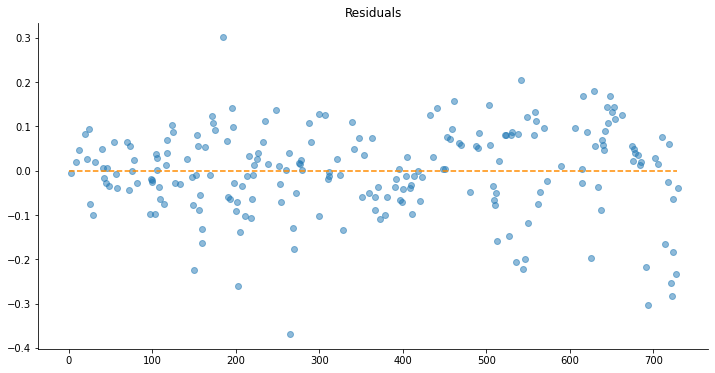

In [1175]:
homoscedasticity_assumption(lm7, X_test_new, Y_test)